In [1]:
from qiskit import QuantumCircuit, transpile,QuantumRegister
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
%matplotlib inline

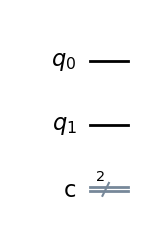

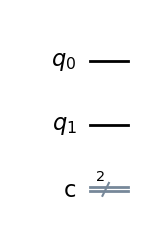

In [2]:
qc = QuantumCircuit(2, 2)
display(qc.draw('mpl'))

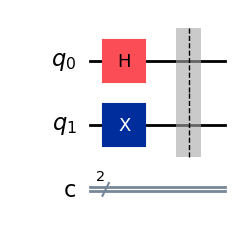

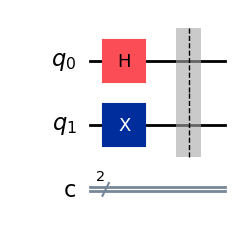

In [3]:
# Encode |0> + |2> = |00> + |10>
qc.h(0)      # creates |0> + |1> on qubit 0
qc.x(1)   
qc.barrier()
display(qc.draw('mpl'))

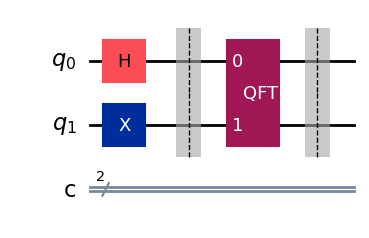

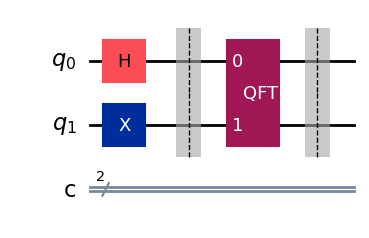

In [4]:
qft = QFT(2, do_swaps=True)
qc.append(qft, [0, 1])

qc.barrier()

display(qc.draw('mpl'))

In [5]:
# Ideal channel: no operation
qc.barrier()


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)), clbits=())

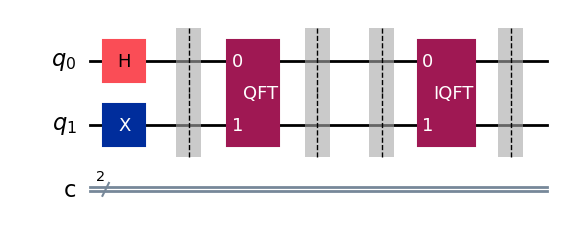

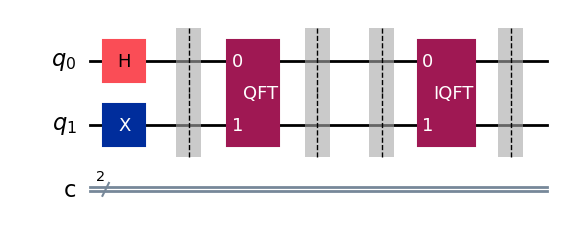

In [6]:
iqft = QFT(2, inverse=True, do_swaps=True)
qc.append(iqft, [0, 1])

qc.barrier()
display(qc.draw('mpl'))

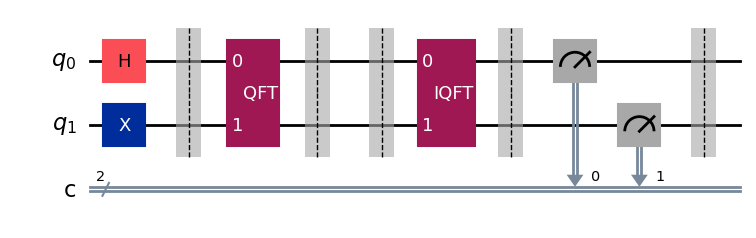

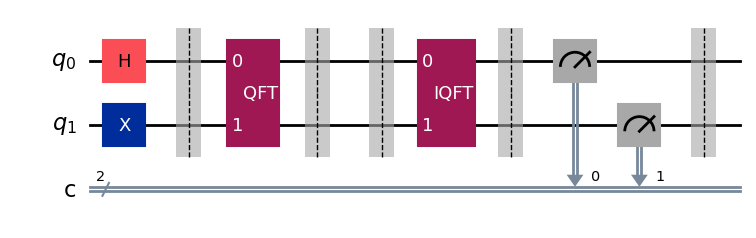

In [8]:
qc.measure([0, 1], [0, 1])
qc.barrier()
display(qc.draw('mpl'))

Measurement results (bitstrings):
{'10': 508, '11': 516}


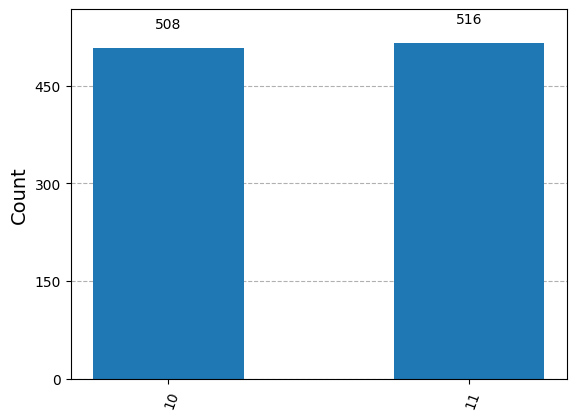

In [9]:
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

print("Measurement results (bitstrings):")
print(counts)
plot_histogram(counts)
plt.show()